# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt 
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_t = pd.read_csv('twitter-archive-enhanced.csv')
df_t.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_req = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(img_req.content)


In [4]:
df_img = pd.read_csv('image_predictions.tsv', sep = '\t')
df_img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_t.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
list_f = []

with open('tweet-json.txt', encoding='utf-8') as json_file:
    for i in json_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        url1 = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url1
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        list_f.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})


In [ ]:
df_json = pd.DataFrame(list_f, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])                                                                                                    
df_json.to_csv('tweet-json.txt', index=False)

In [5]:
df_json = pd.read_csv('tweet-json.txt')

In [6]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df_t


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_t.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
sum(df_t.duplicated())

0

In [11]:
df_t.tweet_id.nunique()

2356

In [12]:
df_t.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
df_t.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
sum(df_img.jpg_url.duplicated())

66

In [18]:
df_img[df_img.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [19]:
df_json

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f
5,891087950875897856,20562,3261,Original tweet,https://t.co/kQ04fDDRmh
6,890971913173991426,12041,2158,Original tweet,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,56848,16716,Original tweet,https://t.co/v0nONBcwxq
8,890609185150312448,28226,4429,Original tweet,https://t.co/9TwLuAGH0b
9,890240255349198849,32467,7711,Original tweet,https://t.co/t1bfwz5S2A


In [20]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [21]:
sum(df_json.duplicated())

0

### Quality issues

1. 'df_t':  I will remove these columns (puppo, pupper, floofer, doggo) and change it with one column with name(type).

2.  'df_t': The (timestamp) column Recorded in a different format.

3.  'df_t': Not necessary the html tags in (source) column. 

4.  'df_t': Unify the values of ( rating_denominator) to be equal 10.

5. 'df_t, df_img, df_json': Convert (tweet_id) column from integer to String

6. 'df_img': Convert (img_num) column from integer to String.

7. 'df_img': Rename the columns (p1, p1_conf, p1_dog
                               , p2, p2_conf, p2_dog
                               , p3, p3_conf, p3_dog) to be more clearly.

8. 'df_img': Remove duplicates in jpg_url column



### Tidiness issues

1. I will remove these Columns in dataframe(df_t):
         in_reply_to_status_id
         in_reply_to_user_id
         retweeted_status_id 
         retweeted_status_user_id
         retweeted_status_timestamp
    because it have alot of null vaues


2. Merge all data frames (df_t, df_img, df_json) into a single data frame named (df)

    


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

# Define

## Tidness
<li> Merge all data frames (df_t, df_img, df_json) into a single data frame named (df) </li> 

## Code

In [22]:
# Make copies of original pieces of data
df_t2 = df_t.copy()
df_img2 = df_img.copy()
df_json2 = df_json.copy()

## Test

In [23]:
# marge dataframes 
df = pd.concat([df_t2, df_img2, df_json2], join='outer', axis=1)
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0,Original tweet,https://t.co/0Xxu71qeIV


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id                      20

# Define

## Tidness

<li> <ul>I will remove these Columns:</ul>
        <ul> in_reply_to_status_id</ul>
        <ul> in_reply_to_user_id</ul>
        <ul> retweeted_status_id </ul>
        <ul> retweeted_status_user_id</ul>
        <ul>retweeted_status_timestamp</ul> 

 </li>
    <p> because it have alot of null vaues</p>

## Code:

In [25]:
df = df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

## Test:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
tweet_id              2075 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-n

# Define

## Quality 
<li>  I will remove these columns (puppo, pupper, floofer, doggo) and change it with one column with name(type).
 </li>

## Code

In [27]:
# I will remove these columns (puppo, pupper, floofer, doggo) and change it with one column with name(type).
df['type'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

# Test

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
tweet_id              2075 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
tweet_id              2354 non-

# Define

## Quality 
<li> Make the (timestamp) column in a correct format. </li>

## Code

In [29]:

df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d ")

## Test

In [30]:
df['timestamp'].sample(2)

583    2016-11-20 04:06:37
1673   2015-12-30 20:54:22
Name: timestamp, dtype: datetime64[ns]

# Define

## Quality 
<li> Remove the html tags in (source) column.  </li>

## Code

In [31]:

df.source = df.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
df.source = df.source.astype('category')

# Test

In [32]:
df['source'].sample(2)

77      Twitter for iPhone
1074    Twitter for iPhone
Name: source, dtype: category
Categories (4, object): [TweetDeck, Twitter Web Client, Twitter for iPhone, Vine - Make a Scene]

# Define

## Quality
<li> Unify the values of ( rating_denominator) to be equal 10.
</li>

## Code

In [33]:
df.rating_denominator = 10

## Test

In [34]:
df['rating_denominator'].sample(1)

324    10
Name: rating_denominator, dtype: int64

# Define 

## Quality
   <li> Convert (tweet_id) column from integer to String
</li>

## Code

In [35]:
df['tweet_id'] = df['tweet_id'].astype(str)

## Test

In [36]:
type(df.iloc[0,0])

str

# Define 

## Quality
   <li> Convert (img_num) column from integer to String.
</li>

## Code

In [37]:
df['img_num'] = df['img_num'].astype(str)

## Test

In [38]:
type(df.iloc[0,10])

str

# Define 

## Quality
   <li> Rename the columns (p1, p1_conf, p1_dog
                               , p2, p2_conf, p2_dog
                               , p3, p3_conf, p3_dog) to be more clearly.
</li>

## Code

In [39]:
df = df.rename(columns = {'p1':'prediction_1','p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog'
           ,'p2':'prediction_2','p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_dog'
           ,'p3':'prediction_3','p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_dog'
            })


## Test

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                  2356 non-null object
timestamp                 2356 non-null datetime64[ns]
source                    2356 non-null category
text                      2356 non-null object
expanded_urls             2297 non-null object
rating_numerator          2356 non-null int64
rating_denominator        2356 non-null int64
name                      2356 non-null object
tweet_id                  2356 non-null object
jpg_url                   2075 non-null object
img_num                   2356 non-null object
prediction_1              2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null object
prediction_2              2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_dog           2075 non-null object
prediction_3              2075 non-null object
prediction3_confidence    2075 non-nu

# Define

## Quality
<li> Remove duplicates in jpg_url column</li> 

#### Code

In [41]:
df.drop_duplicates('jpg_url' , inplace = True)

#### Test

In [42]:
df[df.jpg_url.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_id,jpg_url,...,prediction2_dog,prediction_3,prediction3_confidence,prediction3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,type


## Storing Data

In [43]:
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


## Analyzing and Visualizing Data


In [44]:
df = pd.read_csv('twitter_archive_master.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 26 columns):
tweet_id                  2010 non-null int64
timestamp                 2010 non-null object
source                    2010 non-null object
text                      2010 non-null object
expanded_urls             1957 non-null object
rating_numerator          2010 non-null int64
rating_denominator        2010 non-null int64
name                      2010 non-null object
tweet_id.1                2009 non-null float64
jpg_url                   2009 non-null object
img_num                   2009 non-null float64
prediction_1              2009 non-null object
prediction1_confidence    2009 non-null float64
prediction1_dog           2009 non-null object
prediction_2              2009 non-null object
prediction2_confidence    2009 non-null float64
prediction2_dog           2009 non-null object
prediction_3              2009 non-null object
prediction3_confidence    2009 non-null float6

### Insights #1
 #####  Plot of Retweet Count 


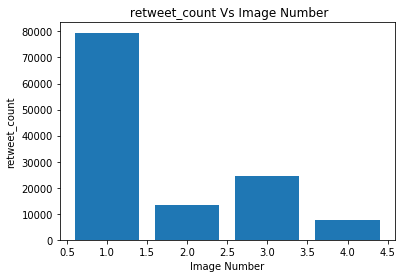

In [46]:
plt.bar(df["img_num"], df['retweet_count'])

plt.title(' retweet_count Vs Image Number')
plt.ylabel('retweet_count')
plt.xlabel('Image Number');
plt.show()


### Insights #2

#### Plot of favorite Count 


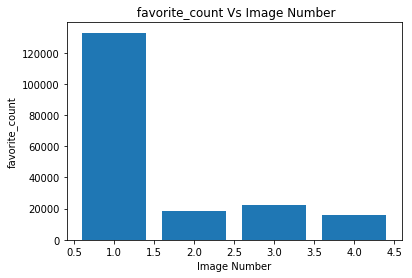

In [59]:
plt.bar(df["img_num"], df['favorite_count'])


plt.title(' favorite_count Vs Image Number')
plt.ylabel('favorite_count')
plt.xlabel('Image Number');


### Insights #3

#### Plot of Image Number Count 

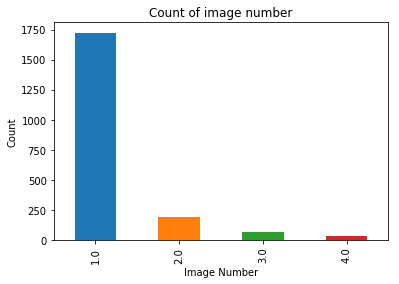

In [48]:
df['img_num'].value_counts().plot(kind='bar')
plt.title('Count of image number')
plt.xlabel('Image Number')
plt.ylabel('Count');



### Insights #4

#### Plot of Dogs Types Count 

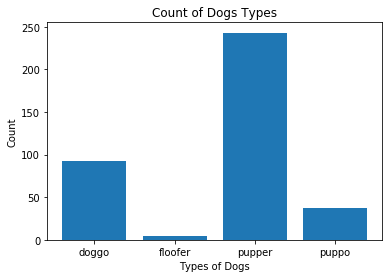

In [56]:
x = list(df['type'].value_counts().index)
y = list(df['type'].value_counts())

plt.bar(x,y)
plt.title("Count of Dogs Types")
plt.xlabel("Types of Dogs")
plt.ylabel("Count")

plt.show()


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0